## Exercise "Natural Language Processing" -- Text Mining and classification

---


For this course, save a COPY to your Google Drive for the tutorial (File -> Save copy in Drive). Then complete the tasks in your saved copy. If you're done, submit the notebook via moodle by sharing a link with the appropriate permissions (preferred, but please do not make changes after the deadline) or by submitting the downloaded `.ipynb` file.

This is an individual assignment, i.e., submit your solutions individually.
This assignment is **ungraded/optional**.

Due date: 011.05.2023, 9:15 a.m.(CEST)


# Text classification
In this assignment, you will be working on the topic of sentiment analysis using the Twitter US Airline Sentiment dataset. We highly encourage you to use the `scikit-learn` library for this assignment.

Download the dataset from [this link](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment) and mount it to your Colab. Alternatively, use the following code for getting the data. Notice that kaggle needs login and the url you need to use for `curl` needs to have the authorization information.

In [1]:
!curl {storage_url_with_auth_header} --output sentiment.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: storage_url_with_auth_header


In [2]:
!unzip sentiment.zip

unzip:  cannot find or open sentiment.zip, sentiment.zip.zip or sentiment.zip.ZIP.


In [3]:
!cat Tweets.csv

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
569513498016923648,negative,1.0,Can't Tell,0.6633,United,,DanielPaulEller,,0,"@united, I don't believe that you do.. http://t.co/7z3GqEBfK2",,2015-02-22 07:06:13 -0800,Chicago,Central Time (US & Canada)
569513049507246081,neutral,0.6292,,0.0,United,,craigsmail,,0,@united can you change DKYDE6 to 4583&gt;36 on 2/23 instead of 3636&gt;606&gt;36; original reservation was for 4404&gt;36 yesterday but was Cancelled Flightled.,,2015-02-22 07:04:26 -0800,"Kansas City, USA",Eastern Time (US & Canada)
569512714961362944,negative,1.0,Late Flight,1.0,United,,KapuriaMd,,0,"@united : flight delayed by 24 hours, lost my wallet, have no money to eat or sleep yet your representatives will not help.#unitedsucks",,2015-02-22 07:03:06 -0800,,
569512239344054274,negative,1.0,Bad Flight,0.3531,United,,pawenrick,,0,@united lost 4 loyal customers and mileage plus card holders. We could have driven to Florida from Pa quicker both ways! Worst t

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



You will be mainly working with the data in `Tweets.csv` file.

**TASK 1:** Then perform explantory data analys on this dataset.

1. Is the data clean? Does it include `NaN`s? How many NaNs in `text` and `airline_sentiment` attributes? If either of `text` or `airline_sentiment` include `NaN` values, remove them.
2. How does the distribution of sentiments look? (Use the `airline_sentiment` attribute)
3. How is the distribution of sentiments w.r.t. each airline? (Hint: Use `histtype='barstacked'` from `Matplotlib`)
3. How does the distribution of tweet lengths, i.e., number of words, look? (Use the `text` attribute)


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


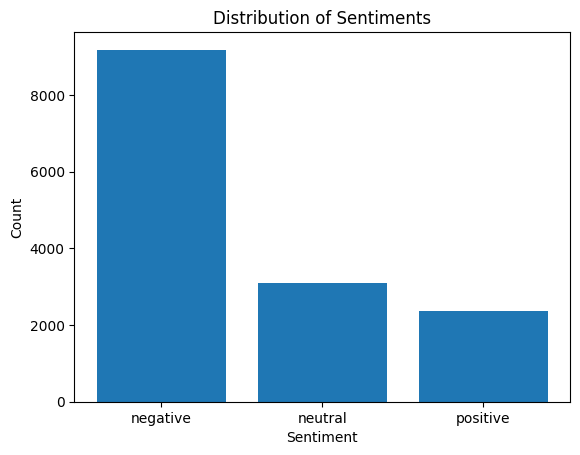

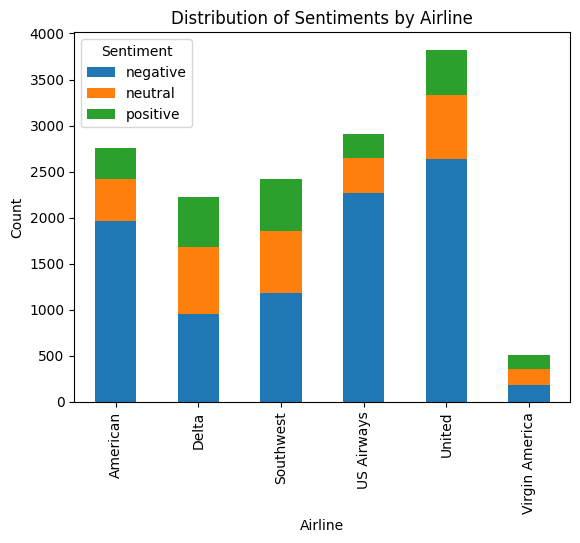

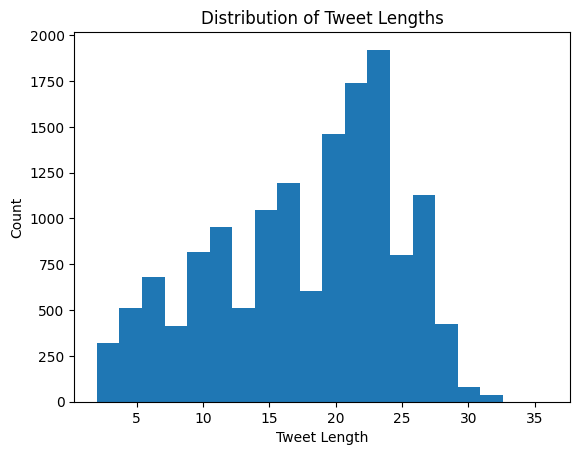

In [12]:
# Complete
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Tweets.csv')
print(df.isnull().sum())
df = df.dropna(subset=['text', 'airline_sentiment'])

sentiment_counts = df['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

sentiment_airline_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack()
sentiment_airline_counts.plot(kind='bar', stacked=True)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Sentiments by Airline')
plt.legend(title='Sentiment')
plt.show()

df['tweet_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.hist(df['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.title('Distribution of Tweet Lengths')
plt.show()

## Text Classification: Multi-layer Perceptron (MLP) and TF-IDF features

In this section, you will be traing a shallow neural network, i.e., multi-layer perceptron, using TF-IDF features for classifying the sentiment of input texts. You are highly encouraged to use the `scikit-learn` library for the tasks in this assignment.

**TASK 2:** Pre-process the input texts, i.e., tweets, for classification. You can use external libraries like `nltk` for this task.

1. Bring the texts to lower case.
2. Remove stop words from the lower-cased text.
3. Perform lemmatization on the lower-cased text without stop words.


In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
# Complete
# df['text_lowered'] = ?

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df['text_lowered'] = df["text"].str.lower()

In [26]:
def remove_stopwords(text, stopwords):
  # Complete

  tokens = word_tokenize(text)
  filtered_tokens = [token for token in tokens if token not in stopwords]
  return ' '.join(filtered_tokens)


# Complete
# df['text_lowered_without_stopwords'] = ?

stop_words = set(stopwords.words("english"))
df['text_lowered_without_stopwords'] = df['text_lowered'].apply(lambda x: remove_stopwords(x, stop_words))


In [28]:
def lemmatize(text, lemmatizer):
    # Complete

    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


# Complete
# df['text_lowered_without_stopwords_lemmatized'] = ?

lemmatizer = WordNetLemmatizer()
df['text_lowered_without_stopwords_lemmatized'] = df['text_lowered_without_stopwords'].apply(lambda x: lemmatize(x, lemmatizer))


**TASK 3:**
1. Obtain TF-IDF features for the pre-processed input texts. You are encouraged to use the `scikit-learn` for this.
2. Split the data into train and test.

In [37]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  # hint
from sklearn.model_selection import train_test_split

np.random.seed(42)  # this is to make sure you get reproducable results

def tf_idf(texts):
  # Complete

  vectorizer = TfidfVectorizer()
  features = vectorizer.fit_transform(texts)
  return features

features = tf_idf(df['text_lowered_without_stopwords_lemmatized'])

X_train, X_test, y_train, y_test = train_test_split(features, df['airline_sentiment'], test_size=0.2, random_state=42)



**TASK 4:**
1. Train a 2-layer perceptron with one hidden layer of the size 30 on your training data. You are encouraged to use the `scikit-learn` library for this task. You can use the default hyperparameters set [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

2. Test your trained MLP on the test data and report accuracy, f1_score and confusion matrix of the predictions.

Food for thought: Which hyperparameter values can improve your model? Hint: Look at the guidelines at the end of this notebook.


In [38]:
from sklearn.neural_network import MLPClassifier as MLP # hint
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# Complete

mlp = MLP(hidden_layer_sizes=(30,), random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7117486338797814
F1-Score: 0.7160759377186454
Confusion Matrix:
[[1515  285   89]
 [ 215  286   79]
 [  91   85  283]]


**TASK 5:** From task 1, you might have noticed that most of the tweets start with "@{airline_username}", e.g., "@VirginAmerica". In this task, you will test if your trained model has been biased with respect to the airline name or not.

1. What fraction of the tweets start with "@{airline_username}"?
2. Remove "@{airline_username}" from all the texts that start with this pattern.
3. Re-apply the pre-processings from TASK 2 and re-fit your TF-IDF feature on the new texts.
4. Re-train your MLP using the TF-IDF features from step 3. Make sure to use the same train/test split.
5. Test your new MLP and report accuracy, f1_score, confusion matrix. Are the results different from task 4? How do you interpret your observations?

In [54]:
airlines = df['airline'].unique()
airlines = [a.replace(' ', '', 1) for a in airlines]  # airline usernames don't have white spaces! So we need to replace them!
airline_usernames = ['@'+airline+' ' for airline in airlines]  # Since usually there is a whitespace after the username in the text
airline_usernames = tuple(airline_usernames)  # because `startswith` works with tuple for checking if any of the elements
print(f'Airline usernames: {airline_usernames}')
# df['text'].apply(lambda x: x.startswith(airline_usernames))  -> this gives you True for all the text cells that start with either elements in the airline_usernames tuple! If we then call `.sum()`, if counts the True values
cnt_texts_starting_with_username = df['text'].apply(lambda x: x.startswith(airline_usernames)).sum()
fraction = cnt_texts_starting_with_username / df.shape[0]
print(f'Fraction of tweets starting with airline username: {fraction}')
def remove_airline_usernames(text, airline_usernames):
  # Complete

  for airlinename in airline_usernames:
        if text.startswith(airlinename):
            text = text.replace(airlinename, '')
  return text


# Complete
# airline_usernames = set()
# df['text_without_airline_username'] = ?


df['text_without_airline_username'] = df['text'].apply(lambda x: remove_airline_usernames(x, airline_usernames))


Airline usernames: ('@VirginAmerica ', '@United ', '@Southwest ', '@Delta ', '@USAirways ', '@American ')
Fraction of tweets starting with airline username: 0.22821038251366121


In [50]:
# Complete
df['text_lowered'] = df['text_without_airline_username'].str.lower()
df['text_lowered_without_stopwords'] = df['text_lowered'].apply(lambda x: remove_stopwords(x, stop_words))
df['text_lowered_without_stopwords_lemmatized'] = df['text_lowered_without_stopwords'].apply(lambda x: lemmatize(x, lemmatizer))


features = tf_idf(df['text_lowered_without_stopwords_lemmatized'])
X_train, X_test, y_train, y_test = train_test_split(features, df['airline_sentiment'], test_size=0.2, random_state=42)

In [51]:
# Complete

mlp = MLP(hidden_layer_sizes=(30,), random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7127732240437158
F1-Score: 0.7150835423145728
Confusion Matrix:
[[1528  271   90]
 [ 232  275   73]
 [  97   78  284]]


**TASK 6**: In this task, you will analyze how your MLP features/neurons are behaving with respect to class prediction. To this end, you will examine which neurons in your MLP model have the largest weights when predicting classes.

1. Using the `coefs_` attribute from your trained MLP model, plot a bar chart that shows the score of each of the 30 neurons in your model for each class.

Hint: Plot the scores only for the output layer. You don't need to plot the scores for the hidden layer.

[-1.97632146  2.46979791  2.02610534  2.52992189  0.60685025 -2.09659694
  1.9818535  -2.2074907   1.95163125  0.92165133 -0.09721454 -2.46641184
 -2.0986035  -0.39542721  2.40955052 -2.34619828 -1.54456538  2.35993947
 -2.85799444 -0.98814177  0.51426856  1.89074365 -1.98256481  2.29025391
  2.22772319 -1.77432809 -1.27227022  2.0951381   2.30008425  1.88166852]
[ 1.56879512 -2.4249217  -3.32302928 -2.92245622  1.81799714 -1.56519074
 -3.11450381 -0.94921861 -1.57836622  0.22407132 -2.28070889 -0.16335456
  1.46091351 -1.58651618 -2.45277928  1.81030972  1.76430807 -3.10027198
  1.28387251 -1.57989129  1.9623532  -1.56597869  1.98937125 -2.03705521
 -1.93396253  1.35826985  1.84597913 -1.59515828 -3.27845457 -0.92540241]
[ 0.85123871 -0.41163799  0.81393415 -0.80795019 -2.81066714  2.03001202
 -0.38082117  1.9144417  -1.53584649 -3.00623182  2.18638854  1.88104517
  1.16536497  2.01551976 -0.98871263  0.7091556  -1.73784004  1.027284
  1.55346845  2.08268157 -2.93655006 -2.16972894 -1

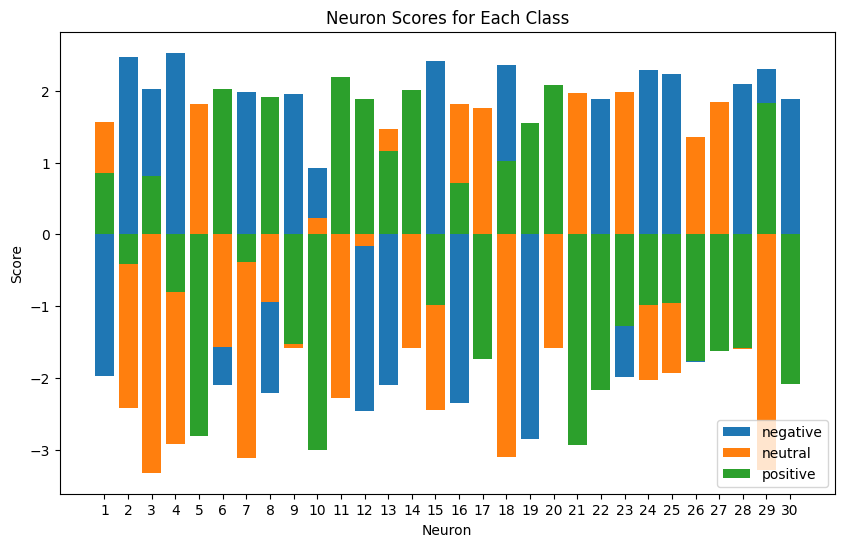

In [72]:
import matplotlib.pyplot as plt
import numpy as np


coefficients = mlp.coefs_[-1]
num_neurons = coefficients.shape[0]
class_labels = mlp.classes_

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(class_labels)):
    ax.bar([x for x in range(len(coefficients[:, i]))], coefficients[:, i], label=class_labels[i])
    print(coefficients[:, i])

tick_positions = np.arange(num_neurons)
tick_labels = np.arange(1, num_neurons + 1)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Neuron')
ax.set_ylabel('Score')
ax.set_title('Neuron Scores for Each Class')
ax.legend()
plt.show()

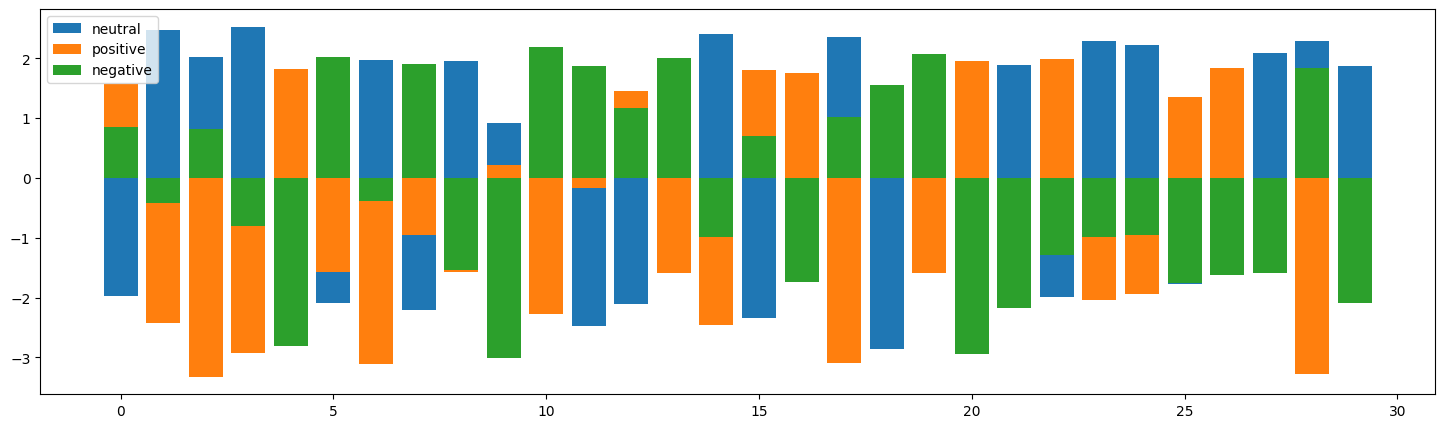

In [60]:
# Complete
weights_cls1 = mlp.coefs_[1][:,0]  # coefficients for the first class
weights_cls2 = mlp.coefs_[1][:,1]  # coefficients for the second class
weights_cls3 = mlp.coefs_[1][:,2]  # coefficients for the third class

fig, ax = plt.subplots(figsize=(18,5))

all_data = [weights_cls1, weights_cls2, weights_cls3]
classes = ['neutral', 'positive', 'negative']  # the order is kept from the beginning

for i, data in enumerate(all_data):
    ax.bar([x for x in range(len(data))], data)
ax.legend(classes)

#### Neural Network Tuning Guide

We improve the performance of our neural networks by tuning **hyperparameters**. These are all things that influence the networks performance except for the neural netwroks weights (parameters), which are tuned during training. Hyperparameters include:
- The learning rate
- The number of training epochs or iterations
- The choice for optimizer
- Network architecture
  - The number of layers in the network (more layers -> deeper network)
  - The "width" of layers in the network (more neurons per layer -> wider network)
  - Activation functions
- Regularization
  - L2-Regularization

This can seem overwhelming and a bit like "alchemy" (and there is some truth to this). But over time, you will reliably build an intuition about what hyperparameters are responsible for what kinds of behavior and which hyperparameters might be responsible for failure modes.

